<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 3 // Machine Learning for Datasets</font></h1>

Title: Hacktiv8 PTP Introduction to Data Science Projects 3: Machine learning\
Last Updated: January 11, 2021\
Author: Raka Ardhi

## Data Preparation

Load the library you need.

Get your NYC property data from [here](https://www.kaggle.com/new-york-city/nyc-property-sales) and load the dataframe to your notebook.

In [34]:
# Get your import statement here
import pandas as pd
import math
import statistics
import numpy as np
import scipy.stats
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load your dataset here
df=pd.read_csv('./bank-additional.csv',sep=';')
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's view the top 5 rows of the dataset using the `head()` function.

In [3]:
# Write your syntax here
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


We can also veiw the bottom 5 rows of the dataset using the `tail()` function.

In [4]:
# Write your syntax here
df.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


To view the dimensions of the dataframe, we use the `.shape` parameter. Expected result: (84548, 22)

In [5]:
# Write your syntax here
df.shape

(4119, 21)

Let's view Dtype of each features in dataframe using `.info()` function.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9+ KB


It looks like empty records are not being treated as NA. We convert columns to their appropriate data types to obtain NAs.

In [7]:
#First, let's check which columns should be categorical
print('Column name')
for col in df.columns:
    if df[col].dtype=='object':
        print(col, df[col].nunique())

Column name
job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
poutcome 3
y 2


transform label into categorial numeric of targetted column

In [36]:
mentah = df['y'].values
print('data y before:',mentah)

udah = LabelEncoder().fit_transform(mentah)
print('data y before:',udah)

data y before: ['no' 'no' 'no' ... 'no' 'no' 'no']
data y before: [0 0 0 ... 0 0 0]


In [37]:
missing = df.isnull().sum()/len(df)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df.isnull().sum()[df.isnull().sum()>1000])], index=['percent missing','how many missing']))

Empty DataFrame
Columns: []
Index: [percent missing, how many missing]


## Exploratory data analysis

In [40]:
df['y_after']=udah
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_after
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no,0


In [67]:
udah = udah.reshape(-1,1)
udah.shape

(4119, 1)

In [63]:
u = np.array(df['age']).reshape(-1,1)
u.shape

(4119, 1)

# Machine Learning

## KNN Algorithm

In [74]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

le = preprocessing.LabelEncoder()

#Converting string labels to numbers
job_encoded = le.fit_transform(df['job'])
marital_encoded = le.fit_transform(df['marital'])
ed_encoded = le.fit_transform(df['education'])
housing_encoded = le.fit_transform(df['housing'])
loan_encoded = le.fit_transform(df['loan'])
j = np.array(job_encoded).reshape(-1,1)
m = np.array(marital_encoded).reshape(-1,1)
e = np.array(ed_encoded).reshape(-1,1)
h = np.array(housing_encoded).reshape(-1,1)
l = np.array(loan_encoded).reshape(-1,1)
np.shape(h)


(4119, 1)

In [70]:
#Combining columns into features
features = np.concatenate((u,j,m,e,h,l), axis=1)
features.shape

(4119, 6)

In [103]:
#Split dataset into training set and data set

x_train, x_test, y_train, y_test = train_test_split(features,udah,test_size=0.2) #80% training and 20% test

mod_KNN = KNeighborsClassifier(n_neighbors=5)
mod_KNN.fit(x_train,y_train)
y_pred_KNN = mod_KNN.predict(x_test)

/usr/local/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [87]:
#See accuracy
from sklearn import metrics
print("Accuracy Model KNN:",metrics.accuracy_score(y_test,y_pred_KNN))

Accuracy Model KNN: 0.8628640776699029


/usr/local/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

/usr/local/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

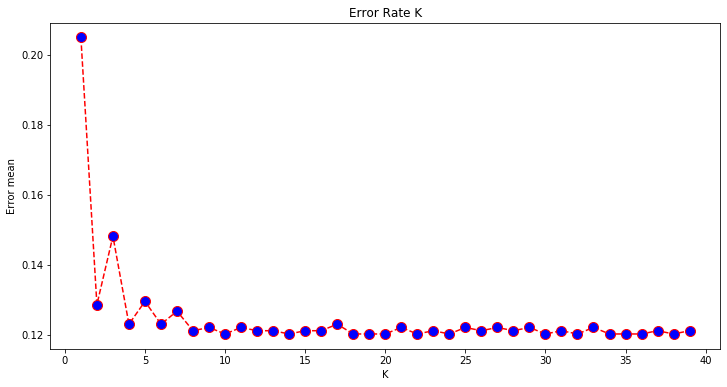

In [104]:
#Find the optimum K

error = []

#Calculating error for K value between 1 and 40
for i in range (1,40):
    mod_KNN = KNeighborsClassifier(n_neighbors=i)
    mod_KNN.fit(x_train,y_train)
    y_pred_KNN_i = mod_KNN.predict(x_test)
    error.append(np.mean(y_pred_KNN_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',
        marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K')
plt.xlabel ('K')
plt.ylabel('Error mean')
plt.show()

In [89]:
#Best model with optimum K =22
mod_KNN = KNeighborsClassifier(n_neighbors=22)
mod_KNN.fit(x_train,y_train)
y_pred_KNN = mod_KNN.predict(x_test)
print("Accuracy Model KNN:",metrics.accuracy_score(y_test,y_pred_KNN))

Accuracy Model KNN: 0.8737864077669902


/usr/local/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## Logistic Regression

In [105]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

#Normalization
print ('x_train_before:',x_train)
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)

print ('x_train_after:',X_train)
print ('x_test_before:',x_test)
print ('x_test_after:',X_test)

x_train_before: [[28  9  2  5  0  0]
 [41  9  1  5  2  0]
 [39  0  1  3  2  0]
 ...
 [36  7  1  3  0  0]
 [45  0  1  3  0  0]
 [39  0  1  6  0  0]]
x_train_after: [[-1.17879839  1.43361184  1.3438469   0.57653874 -1.08643306 -0.47007959]
 [ 0.08785395  1.43361184 -0.29675167  0.57653874  0.94523376 -0.47007959]
 [-0.10701564 -1.0655804  -0.29675167 -0.3553696   0.94523376 -0.47007959]
 ...
 [-0.39932002  0.87823579 -0.29675167 -0.3553696  -1.08643306 -0.47007959]
 [ 0.47759314 -1.0655804  -0.29675167 -0.3553696  -1.08643306 -0.47007959]
 [-0.10701564 -1.0655804  -0.29675167  1.04249292 -1.08643306 -0.47007959]]
x_test_before: [[30  9  2  5  2  0]
 [39  0  1  6  0  0]
 [27  0  2  3  2  0]
 ...
 [38  9  1  5  2  2]
 [43  1  2  0  2  0]
 [35  0  1  5  0  0]]
x_test_after: [[-0.96857237  1.441539    1.414704    0.53191915  0.88805185 -0.46869966]
 [-0.11182944 -1.04172539 -0.27229469  0.9947506  -1.15310499 -0.46869966]
 [-1.25415334 -1.04172539  1.414704   -0.39374374  0.88805185 -0.46869

In [106]:
mod_log = LogisticRegression(solver='liblinear',C=0.05,multi_class='ovr',
                            random_state=0)
mod_log.fit(X_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [107]:
y_pred_log = mod_log.predict(X_test)

In [108]:
mod_log.score(X_train,y_train)

0.8922610015174507

In [109]:
mod_log.score(X_test,y_test)

0.883495145631068

In [111]:
cm = confusion_matrix(y_test,y_pred_log)
cm

array([[728,   0],
       [ 96,   0]])

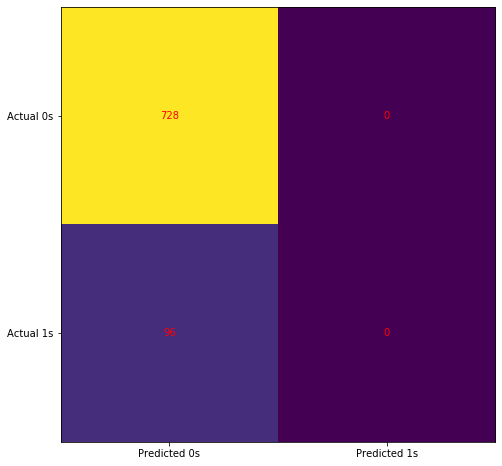

In [112]:

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center', va='center', color = 'red')
plt.show()

In [113]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       728
           1       0.00      0.00      0.00        96

    accuracy                           0.88       824
   macro avg       0.44      0.50      0.47       824
weighted avg       0.78      0.88      0.83       824



/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now we can analyze Probability Distibution below.

Function below are graded function. (1 Points)

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Prob. of Dist.')

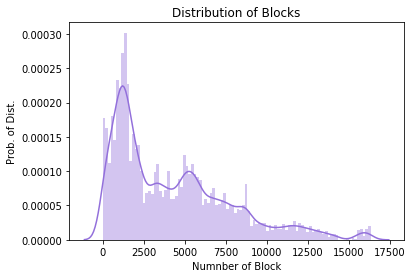

In [24]:
# Write your function below

# Graded-Funtion Begin
sns.distplot(df['BLOCK'],bins=100,kde=True,
               color='mediumpurple')
plt.title("Distribution of Blocks")
plt.xlabel("Numnber of Block")
plt.ylabel("Prob. of Dist.")
# Graded-Funtion End

Now we can analyze Confidence Intervals below.

Function below are graded function. (1 Points)

In [25]:
# Write your function below

# Graded-Funtion Begin
se = std/np.sqrt(len(df['BOROUGH']))
z = 1.96
lcb = ave - z*se
ucb = ave + z*se
lcb,ucb

# Graded-Funtion End

(               BLOCK         LOT      ZIP CODE  RESIDENTIAL UNITS  \
 BOROUGH                                                             
 1        1104.020009  743.222788   9905.254660           2.126069   
 2        4195.778590  293.494814  10353.977029           3.192367   
 3        4299.243860  335.907888  11064.026108           1.953779   
 4        6601.445999  227.151438  11294.305909           1.564532   
 5        3246.083551  195.882410  10036.171539           1.214481   
 
          COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  \
 BOROUGH                                                                       
 1                0.237925     2.439566       5535.122164       31845.044306   
 2                0.154332     3.356566       3784.610409        4289.608631   
 3                0.134316     2.135268       1955.937122        2381.081996   
 4                0.094342     1.752179       3955.480666        3063.504246   
 5                0.066903  

Make your Hypothesis Testing below

Function below are graded function. (1 Points)

In [34]:
# Write your function below

# Graded-Funtion Begin
#Confidence level for sale price between Manhattan (1) and Brooklyn (3)
import statsmodels.api as sm
Man = df[df["BOROUGH"]==1]
Bro = df[df["BOROUGH"]==3]

nM = len(Man)
aveM = Man["SALE PRICE"].mean()
stdM = Man["SALE PRICE"].mean()
#(nM,aveM,stdM)

nB = len(Bro)
aveB = Bro["SALE PRICE"].mean()
stdB = Bro["SALE PRICE"].mean()
#(nB,aveB,stdB)

sm.stats.ztest(Man["SALE PRICE"].dropna(),
              Bro["SALE PRICE"].dropna(),alternative = "two-sided")

# Graded-Funtion End

(15.669358677617621, 2.4503938522822224e-55)

Write your final conclusion below.

Your conclusion below are graded. (1 Points)

The Data is weird, otherwise I don't really understand the instruction whether it should be plotted one by one. I am interested in Machine Learning but I'd be very enthusiast if I use meteorological data, at least I understand the variable, etc. 

#BUT AFTER IT HAS BEEN EXPLAINED, NOW BECOME CLEAR
AS p-value (2.45e-55) is too small, we can *reject the Null hypothesis*  that housing sale price in Manhattan and Brooklyn are same. However,  *two-side* for z-test is used as we haven't checked the inequality of the data.

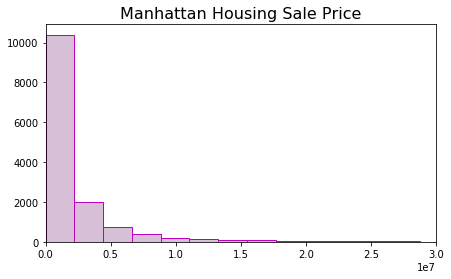

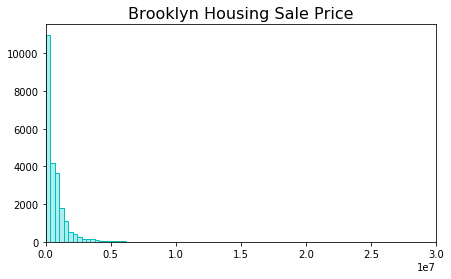

In [44]:
plt.figure(figsize=(7,4))
plt.title("Manhattan Housing Sale Price", fontsize=16)
plt.hist(Man["SALE PRICE"].dropna(),edgecolor='m',
         color='thistle',bins=1000)
plt.xlim(0,30000000)
plt.show()

plt.figure(figsize=(7,4))
plt.title("Brooklyn Housing Sale Price", fontsize=16)
plt.hist(Bro["SALE PRICE"].dropna(),edgecolor='c',
         color='paleturquoise',bins=1000)
plt.xlim(0,30000000)
plt.show()